In [37]:
import dotenv
import os
dotenv.load_dotenv()

False

In [8]:
from openai import AzureOpenAI

api_base = 'https://openaitesting-openai-australiaeast.openai.azure.com/' # your endpoint should look like the following https://YOUR_RESOURCE_NAME.openai.azure.com/
api_key= os.getenv('API_KEY')
deployment_name = 'gpt-4-vision'
api_version = '2023-12-01-preview' # this might change in the future

client = AzureOpenAI(
    api_key=api_key,  
    api_version=api_version,
    base_url=f"{api_base}openai/deployments/{deployment_name}/extensions",
)

Data URL: 

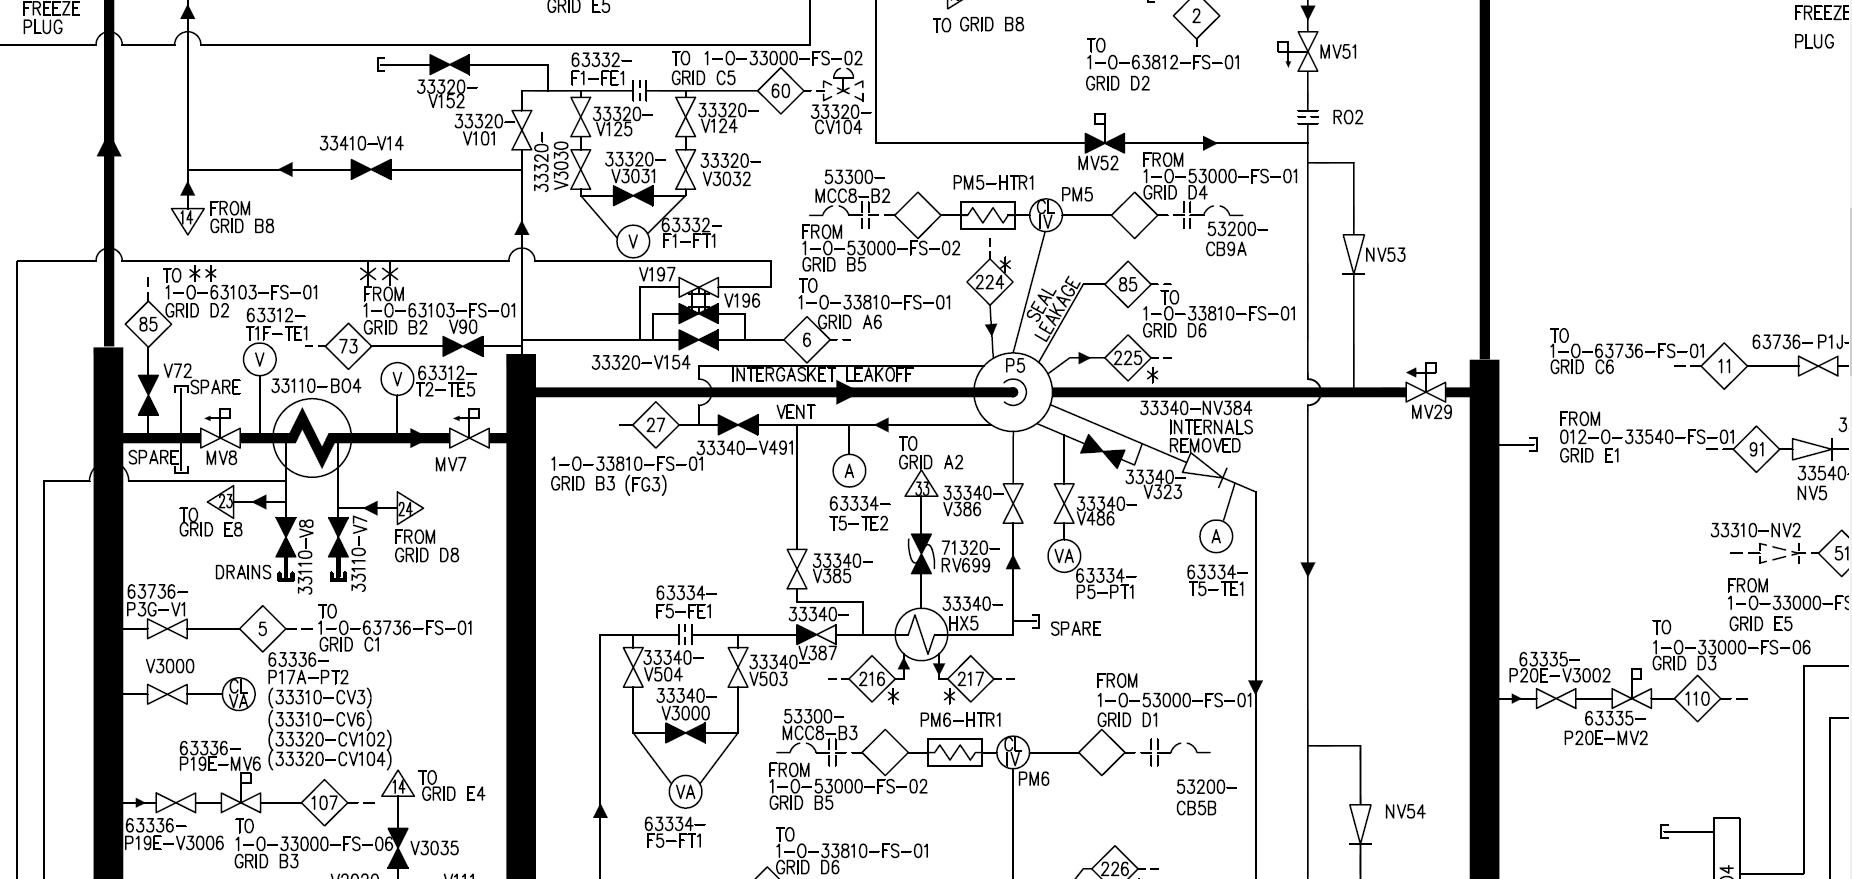

In [21]:
import base64
from mimetypes import guess_type

# Function to encode a local image into data URL 
def local_image_to_data_url(image_path):
    # Guess the MIME type of the image based on the file extension
    mime_type, _ = guess_type(image_path)
    if mime_type is None:
        mime_type = 'application/octet-stream'  # Default MIME type if none is found

    # Read and encode the image file
    with open(image_path, "rb") as image_file:
        base64_encoded_data = base64.b64encode(image_file.read()).decode('utf-8')

    # Construct the data URL
    return f"data:{mime_type};base64,{base64_encoded_data}"

# Example usage
image_path = 'image.png'
data_url = local_image_to_data_url(image_path)
print("Data URL:", data_url)

In [36]:
response = client.chat.completions.create(
    model=deployment_name,
    messages=[
        { "role": "system", "content": "You are a helpful assistant." },
        { "role": "user", "content": [  
            { 
                "type": "text", 
                "text": "What is connected to valve V3031" 
            },
            { 
                "type": "image_url",
                "image_url": {
                    "url": data_url
                }
            }
        ] } 
    ],
    max_tokens=2000 
)
print(response.choices[0].message.content)

In the diagram provided, valve V3031 (marked as 33320-V3031) appears to be connected to a few different components:

1. **To the left:** It is connected to a filter or strainer marked as 33320-V101.
2. **Above:** There's a line leading to valve V196 (marked as 33322-V196), which is further connected to V197.
3. **Below:** A line leads down to another valve marked as V3050 (33324-V3050), and it appears there is a connection that further leads to V504.
4. **To the right:** There is a line leading to valve V302 (marked as 33320-V302).

These connections form part of a larger system, likely relating to fluid or gas flow in a mechanical or industrial process. The precise function of these connections would depend on the broader context of the system which is not visible in the cropped image provided.
